**STEP_1 : BUSSINESS PROBLEM**
- Based on given car features, predict the selling price of used car.
- required R**2 is 0.85 on both train and test.

In [1]:
import pandas as pd
import datetime

In [2]:
df = pd.read_excel("cars_data.xlsx")
df.head()

,Name,Price,Rating,city,Kilometers,Year_of_Purchase,Owner,Fuel_Type,Transmission,RTO,Insurance,Insurance_Type
0,2010 Maruti Alto LXI,"₹ 174,699",4out of 5,3686,"Kilometers34,854 km",Year of PurchaseMay 2010,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,RTOAP09,NaN,Insurance TypeInsurance Expired
1,2013 Maruti Wagon R 1.0 VXI,"₹ 333,999",4.2out of 5,3686,"Kilometers39,541 km",Year of PurchaseJuly 2013,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance6/8/2021,Insurance TypeComp
2,2014 Maruti Wagon R 1.0 VXI,"₹ 353,199",4.3out of 5,3686,"Kilometers23,233 km",Year of PurchaseMarch 2014,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance28/4/2021,Insurance TypeComp
3,2013 Hyundai Eon D LITE PLUS,"₹ 237,899",4.4out of 5,3686,"Kilometers27,748 km",Year of PurchaseNovember 2013,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,RTOAP13,Insurance1/1/2022,Insurance TypeComp
4,2017 Hyundai Eon ERA PLUS,"₹ 300,699",4.4out of 5,3686,"Kilometers12,238 km",Year of PurchaseAugust 2017,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOTS10,NaN,Insurance TypeExpired


**STEP_2 : DATA UNDERSTANDING**

**Features:**
1. Independent variables
    - Name: Car Model name along with purchase year of the car.
    - Rating: Rating given while car inspection by cars 24 team out of 5.
    - City: City of that car placed for advertainment, city is given interms of code format.
    - Kilometres: How many kilometres that particular car has driven for before placing that advertisement.
    - Year of purchase: Original Date of purchase of that car.
    - Owner: How many previous owners it had before selling on cars24 site.
    - Fuel type: Type of fuel which car runs on. (Petrol, diesel ...)
    - Transmission: whether car is automated or manual transmission.
    - RT0: Car registered under which RTO
    - Insurance: expiry date of the insurance if any
    - Insurance Type: Different types insurance availed by owner.
2. Target:
    - Price: Price of the used car

In [3]:
df.shape

(32158, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32158 entries, 0 to 32157
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              32158 non-null  object
 1   Price             32158 non-null  object
 2   Rating            32158 non-null  object
 3   city              32158 non-null  int64 
 4   Kilometers        32158 non-null  object
 5   Year_of_Purchase  32158 non-null  object
 6   Owner             32158 non-null  object
 7   Fuel_Type         32158 non-null  object
 8   Transmission      29342 non-null  object
 9   RTO               32158 non-null  object
 10  Insurance         22965 non-null  object
 11  Insurance_Type    32158 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.9+ MB


In [5]:
df.isnull().sum()

Name                   0
Price                  0
Rating                 0
city                   0
Kilometers             0
Year_of_Purchase       0
Owner                  0
Fuel_Type              0
Transmission        2816
RTO                    0
Insurance           9193
Insurance_Type         0
dtype: int64

In [6]:
df.isnull().mean() * 100

Name                 0.000000
Price                0.000000
Rating               0.000000
city                 0.000000
Kilometers           0.000000
Year_of_Purchase     0.000000
Owner                0.000000
Fuel_Type            0.000000
Transmission         8.756763
RTO                  0.000000
Insurance           28.586977
Insurance_Type       0.000000
dtype: float64

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['Name', 'Price', 'Rating', 'city', 'Kilometers', 'Year_of_Purchase',
       'Owner', 'Fuel_Type', 'Transmission', 'RTO', 'Insurance',
       'Insurance_Type'],
      dtype='object')

**COLUMN_1**

In [9]:
df['Name']

0                         2010 Maruti Alto LXI
1                  2013 Maruti Wagon R 1.0 VXI
2                  2014 Maruti Wagon R 1.0 VXI
3                 2013 Hyundai Eon D LITE PLUS
4                    2017 Hyundai Eon ERA PLUS
                         ...                  
32153                2008 Ford Fiesta 1.6 ZXI 
32154            2015 Chevrolet Beat LS DIESEL
32155         2008 Ford Endeavour XLT TDCI 4X2
32156          2016 Maruti Swift Dzire VDI ABS
32157    2007 Mercedes Benz C Class 220 CDI AT
Name: Name, Length: 32158, dtype: object

In [10]:
# Extract year (first 4 digits) using apply
df['Year_of_Purchase'] = df['Name'].apply(lambda x: x[:4]).astype(int)

# Extract Brand (first two words after the year)
df['Brand'] = df['Name'].apply(lambda x: ' '.join(x.split()[1:3]))

# Extract Model (assuming it's between the brand and the variant/number)
df['Model'] = df['Name'].apply(lambda x: ' '.join(x.split()[3:-1]) if len(x.split()) > 3 else '')

# Extract Variant (rest of the words after model)
df['Variant'] = df['Name'].apply(lambda x: ' '.join(x.split()[-1:]) if len(x.split()) > 3 else '')

1. Year of Purchase
   - The Name column contains the year of purchase as the first 4 digits, which I need to extract for later analysis (like calculating the car's age).
2. Brand
   - The Name column usually contains the car brand (e.g., Maruti, Toyota) as part of the model name, and I need to extract it for classification or analysis.
3. Model:
   - Following the brand, the model name (e.g., Alto, Corolla) is present. Extracting the model allows us to understand the specific car type and perform further analyses based on car models.
4. Variant:
   - The variant (e.g., LXI, VXI, CDI, AT) often appears after the model and can provide valuable insights into the car’s features (like transmission type, engine type, or trim level).

In [11]:
df.drop(columns='Name', inplace=True)

In [12]:
df['Year_of_Purchase']

0        2010
1        2013
2        2014
3        2013
4        2017
         ... 
32153    2008
32154    2015
32155    2008
32156    2016
32157    2007
Name: Year_of_Purchase, Length: 32158, dtype: int64

In [13]:
df['Brand']

0           Maruti Alto
1          Maruti Wagon
2          Maruti Wagon
3           Hyundai Eon
4           Hyundai Eon
              ...      
32153       Ford Fiesta
32154    Chevrolet Beat
32155    Ford Endeavour
32156      Maruti Swift
32157     Mercedes Benz
Name: Brand, Length: 32158, dtype: object

In [14]:
df['Model']

0                       
1                  R 1.0
2                  R 1.0
3                 D LITE
4                    ERA
              ...       
32153                1.6
32154                 LS
32155           XLT TDCI
32156          Dzire VDI
32157    C Class 220 CDI
Name: Model, Length: 32158, dtype: object

In [15]:
df['Variant']

0           LXI
1           VXI
2           VXI
3          PLUS
4          PLUS
          ...  
32153       ZXI
32154    DIESEL
32155       4X2
32156       ABS
32157        AT
Name: Variant, Length: 32158, dtype: object

In [16]:
# Calculate Car Age
current_year = datetime.datetime.now().year
df['Car_Age'] = current_year - df['Year_of_Purchase']

**Car Age**
- By subtracting the extracted year of purchase from the current year, I can calculate the car's age, which is an important feature for pricing and understanding depreciation trends.

**COLUMN_2**

In [17]:
df['Price']

0        ₹ 174,699
1        ₹ 333,999
2        ₹ 353,199
3        ₹ 237,899
4        ₹ 300,699
           ...    
32153    ₹ 150,000
32154    ₹ 250,000
32155    ₹ 500,000
32156    ₹ 600,000
32157    ₹ 484,000
Name: Price, Length: 32158, dtype: object

In [18]:
# Remove the '₹' symbol and commas
df['Price'] = df['Price'].replace({'₹': '', ',': ''}, regex=True)

# Convert the cleaned values to numeric (float or int)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

- The data type of the 'Price' column was incorrect, so I converted it from object to int.

In [19]:
df['Price'].dtype

dtype('int64')

**COLUMN_3**

In [20]:
df['Rating']

0          4out of 5
1        4.2out of 5
2        4.3out of 5
3        4.4out of 5
4        4.4out of 5
            ...     
32153    3.4out of 5
32154    3.5out of 5
32155    3.6out of 5
32156    4.7out of 5
32157    3.8out of 5
Name: Rating, Length: 32158, dtype: object

In [21]:
# Remove the 'out of 5' text and any spaces, then convert to numeric
df['Rating'] = df['Rating'].replace({'out of 5': '', ' ': ''}, regex=True)

# Convert the cleaned values to numeric (float)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

- I converted the Rating column from object to numeric format because machine learning models understand only numeric data, and it is also required for analysis.

In [22]:
df['Rating'].dtype

dtype('float64')

In [23]:
df['Rating'].describe()

count    32158.000000
mean         4.046806
std          0.617091
min          0.500000
25%          3.800000
50%          4.100000
75%          4.400000
max          5.000000
Name: Rating, dtype: float64

**COLUMN_4**

In [24]:
df['city']

0        3686
1        3686
2        3686
3        3686
4        3686
         ... 
32153     769
32154     769
32155     769
32156     769
32157     769
Name: city, Length: 32158, dtype: int64

In [25]:
df['city'].nunique()

10

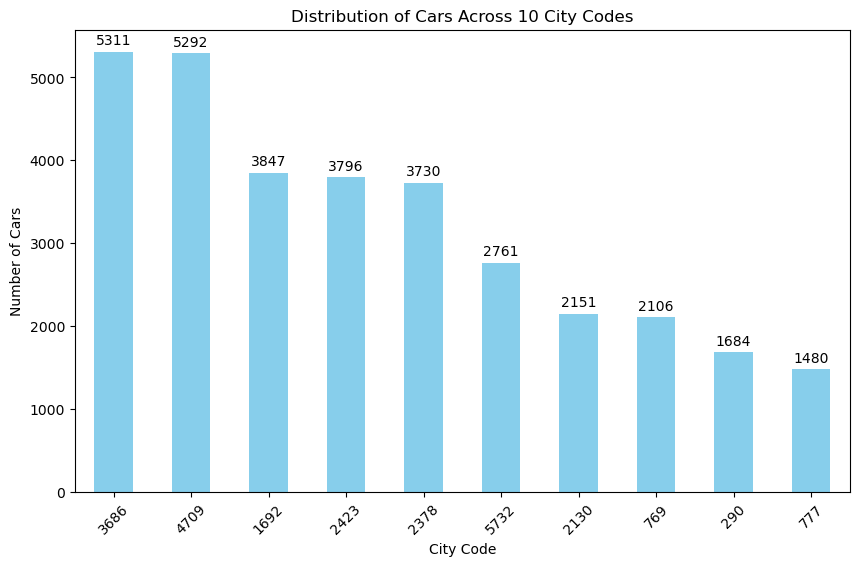

In [26]:
import matplotlib.pyplot as plt

# Plot the city distribution
city_counts = df['city'].value_counts()

# Plot the top 10 city distribution
ax = city_counts.head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')

# Add value annotations over the bars
for i, v in enumerate(city_counts.head(10)):
    ax.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=10)  # Adjust offset as needed

# Add title and labels
plt.title("Distribution of Cars Across 10 City Codes")
plt.xlabel("City Code")
plt.ylabel("Number of Cars")
plt.xticks(rotation=45)

# Show the plot
plt.show()

**COLUMN_5**

In [27]:
df['Kilometers']

0         Kilometers34,854 km
1         Kilometers39,541 km
2         Kilometers23,233 km
3         Kilometers27,748 km
4         Kilometers12,238 km
                 ...         
32153     Kilometers95,792 km
32154     Kilometers54,505 km
32155    Kilometers161,322 km
32156     Kilometers52,006 km
32157     Kilometers88,818 km
Name: Kilometers, Length: 32158, dtype: object

In [28]:
# Remove the 'Kilometers' and ' km' parts and convert to integer
df['Kilometers'] = df['Kilometers'].str.replace('Kilometers', '').str.replace(' km', '').str.replace(',', '').astype(int)

- The data type of the 'Kilometers' column was incorrect, so I converted it from object to int.

In [29]:
df['Kilometers'].dtype

dtype('int64')

**COLUMN_5**

In [30]:
df['Year_of_Purchase'].isnull().sum()

0

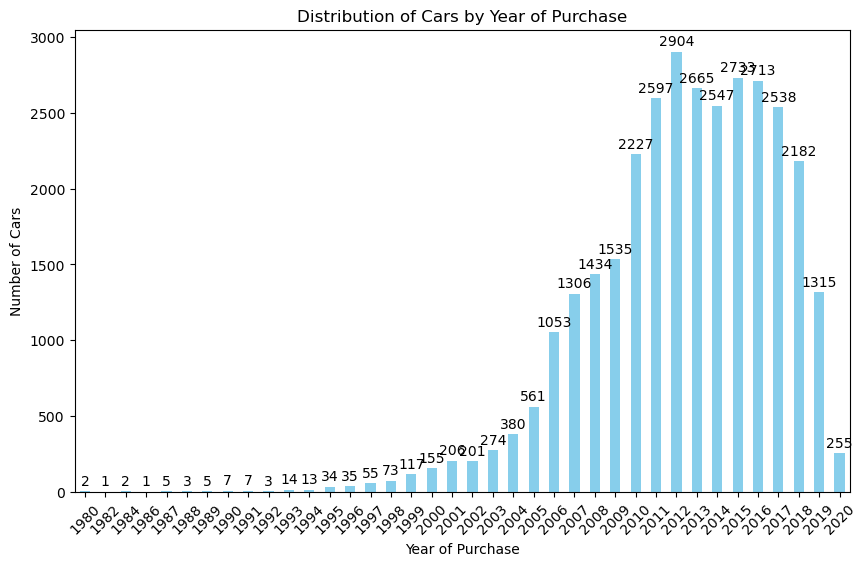

In [31]:
import matplotlib.pyplot as plt

# Count the occurrences of each year in the 'Year_of_Purchase' column
year_counts = df['Year_of_Purchase'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
ax = year_counts.sort_index().plot(kind='bar', color='skyblue')

# Add value annotations over the bars
for i, v in enumerate(year_counts.sort_index()):
    ax.text(i, v + 20, str(v), ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Cars by Year of Purchase')
plt.xlabel('Year of Purchase')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()

**COLUMN_6**

In [32]:
df['Owner']

0         OwnerFirst Owner
1        OwnerSecond Owner
2        OwnerSecond Owner
3         OwnerFirst Owner
4        OwnerSecond Owner
               ...        
32153     OwnerThird Owner
32154    OwnerSecond Owner
32155    OwnerSecond Owner
32156     OwnerFirst Owner
32157    OwnerSecond Owner
Name: Owner, Length: 32158, dtype: object

In [33]:
# Create a mapping for owner strings to numbers
owner_mapping = {
    'OwnerFirst Owner': 1,
    'OwnerSecond Owner': 2,
    'OwnerThird Owner': 3,
    'OwnerFourth Owner': 4,
    'OwnerFifth Owner': 5,
    'OwnerSixth Owner': 6,
    'OwnerSeventh Owner': 7,
    'OwnerEighth Owner': 8,
    'OwnerNinth Owner': 9,
    'OwnerTenth Owner': 10
}

# Apply the mapping to the 'Owner' column
df['Owner'] = df['Owner'].map(owner_mapping)

- I mapped this because 'OwnerFirst Owner' and similar values provide useful information, but it is not in an easily usable format.
- Additionally, machine learning models understand numeric data, so I converted this from an object to an integer format.

In [34]:
df['Owner'].dtype

dtype('int64')

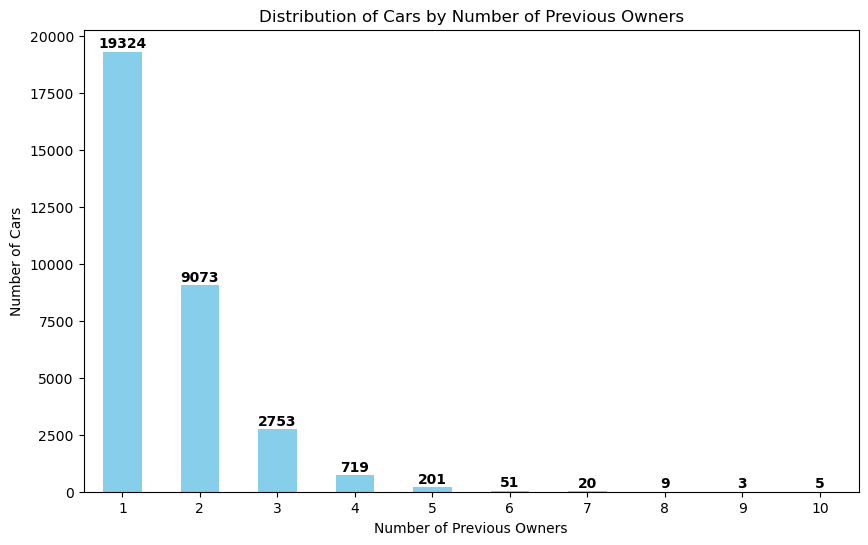

In [35]:
import matplotlib.pyplot as plt

# Plot the distribution of 'Owner' column (number of previous owners)
owner_counts = df['Owner'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = owner_counts.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Distribution of Cars by Number of Previous Owners')
plt.xlabel('Number of Previous Owners')
plt.ylabel('Number of Cars')
plt.xticks(rotation=0)  # To keep x-axis labels horizontal

# Add values over the bars
for i, v in enumerate(owner_counts):
    ax.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

plt.show()

**COLUMN_7**

In [36]:
df['Fuel_Type']

0        FuelPetrol
1        FuelPetrol
2        FuelPetrol
3        FuelPetrol
4        FuelPetrol
            ...    
32153    FuelPetrol
32154    FuelDiesel
32155    FuelDiesel
32156    FuelDiesel
32157    FuelDiesel
Name: Fuel_Type, Length: 32158, dtype: object

In [37]:
# Extract just the fuel type (e.g., 'Petrol', 'Diesel') from 'Fuel_Type' column
df['Fuel_Type'] = df['Fuel_Type'].str.replace('Fuel', '', regex=True)

In [38]:
df['Fuel_Type'].value_counts()

Fuel_Type
Diesel          15121
Petrol          15013
Petrol + CNG     1496
Petrol + LPG      503
Electric           24
Hybrid              1
Name: count, dtype: int64

In [39]:
# Create a mapping for Fuel_Type strings to numbers
Fuel_Type_mapping = {
    'Diesel': 0,
    'Electric': 1,
    'Hybrid': 2,
    'Petrol': 3,
    'Petrol + CNG': 4,
    'Petrol + LPG': 5,
}

# Apply the mapping to the 'Owner' column
df['Fuel_Type'] = df['Fuel_Type'].map(Fuel_Type_mapping)

- I did the mapping because machine learning models understand numerical data.

**COLUMN_8**

In [40]:
df['Transmission']

0           TransmissionMANUAL
1           TransmissionMANUAL
2           TransmissionMANUAL
3           TransmissionMANUAL
4           TransmissionMANUAL
                 ...          
32153       TransmissionMANUAL
32154       TransmissionMANUAL
32155       TransmissionMANUAL
32156                      NaN
32157    TransmissionAUTOMATIC
Name: Transmission, Length: 32158, dtype: object

In [41]:
df['Transmission'] = df['Transmission'].str.replace('Transmission', '', regex=True)

In [42]:
df['Transmission'].value_counts()

Transmission
MANUAL       26620
AUTOMATIC     2722
Name: count, dtype: int64

In [43]:
df['Transmission'].isnull().sum()

2816

**COLUMN_9**

In [44]:
df['RTO']

0        RTOAP09
1        RTOAP28
2        RTOAP28
3        RTOAP13
4        RTOTS10
          ...   
32153    RTOCH04
32154    RTOPB13
32155    RTOHR03
32156    RTOPB65
32157    RTOPB65
Name: RTO, Length: 32158, dtype: object

In [45]:
df['RTO'] = df['RTO'].str.replace('RTO', '', regex=True)

In [46]:
df['RTO'].isnull().sum()

0

**COLUMN_10**

In [47]:
df['Insurance']

0                        NaN
1          Insurance6/8/2021
2         Insurance28/4/2021
3          Insurance1/1/2022
4                        NaN
                ...         
32153                    NaN
32154                    NaN
32155                    NaN
32156    Insurance27/10/2019
32157    Insurance28/11/2019
Name: Insurance, Length: 32158, dtype: object

In [48]:
df['Insurance'] = df['Insurance'].str.replace('Insurance', '', regex=True)

In [49]:
df['Insurance'] = pd.to_datetime(df['Insurance'], errors='coerce')

In [50]:
df['Insurance'].isnull().sum()

23658

**COLUMN_11**

In [51]:
df['Insurance_Type']

0        Insurance TypeInsurance Expired
1                     Insurance TypeComp
2                     Insurance TypeComp
3                     Insurance TypeComp
4                  Insurance TypeExpired
                      ...               
32153    Insurance TypeInsurance Expired
32154    Insurance TypeInsurance Expired
32155    Insurance TypeInsurance Expired
32156    Insurance TypeZero Depreciation
32157        Insurance TypeComprehensive
Name: Insurance_Type, Length: 32158, dtype: object

In [52]:
df['Insurance_Type'] = df['Insurance_Type'].str.replace('Insurance Type', '', regex=True)

In [53]:
df['Insurance_Type'].value_counts()

Insurance_Type
Comprehensive        6506
Insurance Expired    5426
Comp                 5295
Expired              3976
3rd Party            3642
Zero Depreciation    2884
Third_party          2648
Zero_Dep             1750
Not Available          24
Normal                  5
NA                      1
null                    1
Name: count, dtype: int64

In [54]:
# Standardize the values
df['Insurance_Type'] = df['Insurance_Type'].replace({
    'Comp': 'Comprehensive',
    'Expired': 'Insurance Expired',
    'Third_party': '3rd Party',
    'Zero_Dep': 'Zero Depreciation',
    'null': 'NA',
    'Not Available': 'NA',
})

In [55]:
df['Insurance_Type'].value_counts()

Insurance_Type
Comprehensive        11801
Insurance Expired     9402
3rd Party             6290
Zero Depreciation     4634
NA                      26
Normal                   5
Name: count, dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32158 entries, 0 to 32157
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Price             32158 non-null  int64         
 1   Rating            32158 non-null  float64       
 2   city              32158 non-null  int64         
 3   Kilometers        32158 non-null  int64         
 4   Year_of_Purchase  32158 non-null  int64         
 5   Owner             32158 non-null  int64         
 6   Fuel_Type         32158 non-null  int64         
 7   Transmission      29342 non-null  object        
 8   RTO               32158 non-null  object        
 9   Insurance         8500 non-null   datetime64[ns]
 10  Insurance_Type    32158 non-null  object        
 11  Brand             32158 non-null  object        
 12  Model             32158 non-null  object        
 13  Variant           32158 non-null  object        
 14  Car_Age           3215

In [57]:
df.isnull().sum()

Price                   0
Rating                  0
city                    0
Kilometers              0
Year_of_Purchase        0
Owner                   0
Fuel_Type               0
Transmission         2816
RTO                     0
Insurance           23658
Insurance_Type          0
Brand                   0
Model                   0
Variant                 0
Car_Age                 0
dtype: int64

In [58]:
import numpy as np

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Extract the correlation of all features with the target variable (e.g., 'Price')
target_corr = correlation_matrix['Price']  # Replace 'Price' with your target variable

# Display the correlation values
print(target_corr)

Price               1.000000
Rating              0.426457
city                0.106947
Kilometers         -0.188334
Year_of_Purchase    0.500137
Owner              -0.229177
Fuel_Type          -0.283225
Car_Age            -0.500137
Name: Price, dtype: float64


1. Year_of_Purchase (0.500137)
   - There is a moderate positive correlation between the year of purchase and the price. This suggests that newer cars tend to have a higher price.
2. Rating (0.426457)
   - The car rating has a moderate positive correlation with the price. Higher-rated cars are likely to have a higher price.
3. city (0.106947)
   - This shows a very weak positive correlation with price, meaning the city code has a minor effect on car price.
4. Kilometers (-0.188334)
   - There is a weak negative correlation between the kilometers driven and the price. As the kilometers increase, the car price tends to decrease slightly.
5. Owner (-0.229177)
   - This shows a weak negative correlation. This means cars with more previous owners tend to have a slightly lower price.
6. Fuel_Type (-0.283225)
    - There is a moderate negative correlation, which could imply that certain fuel types (like Diesel) might have lower prices compared to others.
7. Car_Age (-0.500137)
   - A moderate negative correlation with price, meaning as the car age increases, its price decreases.

**STEP_3: Data PreProcessing**

**1. Invalid Data Type**
   - There are no invalid data types left now. I have corrected them in the data understanding phase.

**2. Handle Missing Data**
   - There are 2,816 null values in the Transmission column.
   - There are 23,658 null values in the Insurance column.
   - There are 26 null values in the Insurance_Type column.

**Transmission column**

In [59]:
# Impute missing 'Transmission' with the most frequent category
df['Transmission'].fillna(df['Transmission'].mode()[0], inplace=True)

I am filling the null values with the mode because:
- The Transmission column contains categorical data, where mean or median imputation techniques may not be suitable.
- I am not dropping this column because it has only 8.75% missing values.

**Insurance column**

In [60]:
# Extract features from 'Insurance' datetime column
df['Insurance_Year'] = df['Insurance'].dt.year
df['Insurance_Month'] = df['Insurance'].dt.month
df['Insurance_Day'] = df['Insurance'].dt.day
df['Insurance_Weekday'] = df['Insurance'].dt.weekday
df['Insurance_Elapsed'] = (df['Insurance'].max() - df['Insurance']).dt.days
# Calculate correlation of new features with 'Price'
correlation_matrix = df[['Price', 'Insurance_Year', 'Insurance_Month', 'Insurance_Day', 
                         'Insurance_Weekday', 'Insurance_Elapsed']].corr()

# Display correlation with target variable (Price)
print(correlation_matrix['Price'])

Price                1.000000
Insurance_Year       0.064231
Insurance_Month     -0.014749
Insurance_Day       -0.022944
Insurance_Weekday   -0.001070
Insurance_Elapsed   -0.044177
Name: Price, dtype: float64


In [61]:
df.drop(columns='Insurance', inplace=True)

- I am droping this column because it has 29% Missing values.
- The correlations between the datetime-derived features and the Price target variable are very weak.
- These features do not seem to have a strong relationship with Price. So, That's why I am droping this column

In [62]:
df.drop(columns = ['Insurance_Year', 'Insurance_Month', 'Insurance_Day', 'Insurance_Weekday', 'Insurance_Elapsed'], inplace=True)

- I am dropping these columns because I only extracted them to check the correlation with the target variable.
- Since there is no strong relationship, I am dropping them.

**Insurance_Type**

In [63]:
# Impute missing 'Insurance_Type' with the most frequent category
df['Insurance_Type'].replace('NA', df['Insurance_Type'].mode()[0], inplace=True)

I am filling the null values with the mode because:
- The Insurance_Type column contains categorical data, where mean or median imputation techniques may not be suitable.
- I am not dropping this column because it has only 0.08% missing values.

**3. Handle Categorical Data**

1. Transmission

In [64]:
df['Transmission'].value_counts()

Transmission
MANUAL       29436
AUTOMATIC     2722
Name: count, dtype: int64

In [65]:
# Create a mapping for Transmission values
transmission_mapping = {
    'MANUAL': 0,
    'AUTOMATIC': 1
}

# Apply the mapping to the Transmission column
df['Transmission'] = df['Transmission'].map(transmission_mapping)

In [66]:
df['Transmission'].value_counts()

Transmission
0    29436
1     2722
Name: count, dtype: int64

2. RTO

In [67]:
from scipy import stats

# Perform ANOVA to test if 'Price' varies significantly across 'RTO' groups
rto_groups = [group['Price'].values for name, group in df.groupby('RTO')]
f_stat, p_value = stats.f_oneway(*rto_groups)

# Display the results
print(f'F-statistic: {f_stat}, p-value: {p_value}')

F-statistic: 3.935904997452039, p-value: 5.90100565552551e-250


- i have applied Annova to  test if the means of a continuous variable (e.g., Price) differ significantly across different groups of a categorical variable (e.g., RTO) or for checking the relation between price and RTo

In [68]:
# Frequency encoding
rto_counts = df['RTO'].value_counts()
df['RTO_encoded'] = df['RTO'].map(rto_counts)

- I have appplied this becuayse, There are 777 unique values in the RTO column, One-Hot Encoding may lead to a large number of columns, making the dataset sparse and potentially inefficient.
- Frequency encoding replaces each unique category in the RTO column with its frequency (i.e., how many times that category appears in the dataset).
- This will reduce dimensionality compared to One-Hot Encoding.

In [69]:
df.drop(columns = ['RTO'], inplace=True)

3. Insurance_Type

In [70]:
df['Insurance_Type'].value_counts()

Insurance_Type
Comprehensive        11827
Insurance Expired     9402
3rd Party             6290
Zero Depreciation     4634
Normal                   5
Name: count, dtype: int64

In [71]:
# Create a mapping for Transmission values
Insurance_Type_mapping = {
    '3rd Party': 0,
    'Comprehensive': 1,
    'Insurance Expired': 2,
    'Normal': 3,
    'Zero Depreciation':4   
}

# Apply the mapping to the Transmission column
df['Insurance_Type'] = df['Insurance_Type'].map(Insurance_Type_mapping)

4. Brand, Variant, Model

In [72]:
brand_mapping = {brand: idx for idx, brand in enumerate(df['Brand'].unique())}
df['Brand'] = df['Brand'].map(brand_mapping)

In [73]:
brand_mapping = {brand: idx for idx, brand in enumerate(df['Model'].unique())}
df['Model'] = df['Model'].map(brand_mapping)

**Exploratory Data Analysis(EDA)**

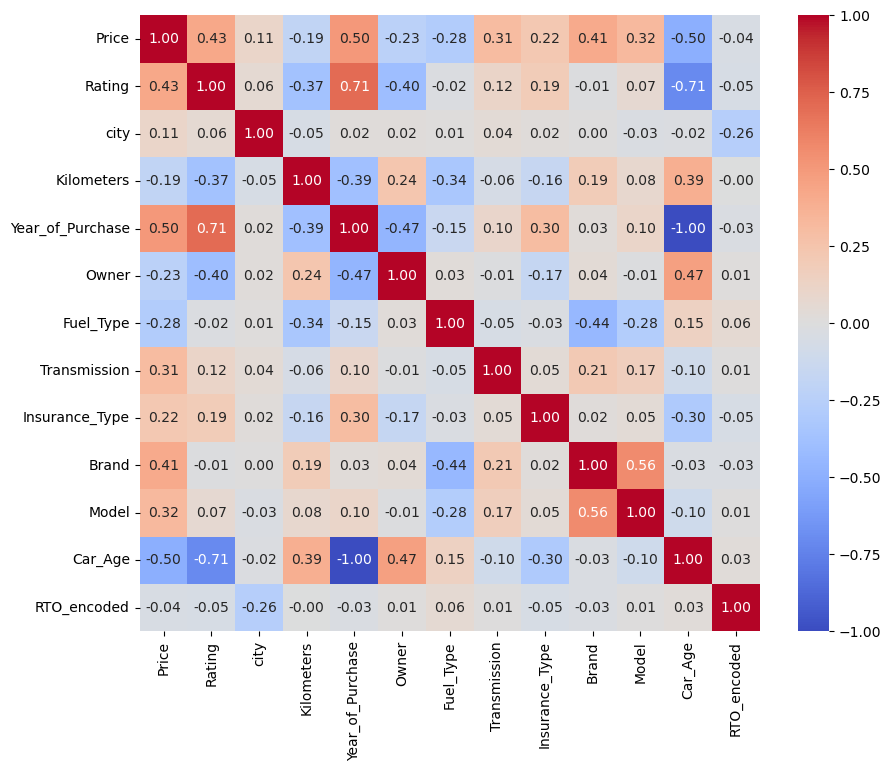

In [74]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [75]:
df.drop(columns='RTO_encoded', inplace=True)

- A correlation of -0.04 indicates that RTO_encoded has almost no linear relationship with the target variable (Price).
- Features that do not show a strong relationship with the target can add noise to the model, making it harder to learn useful patterns.

In [76]:
df.drop(columns=['Variant'], inplace=True)

- A correlation of 0 indicates that Variant has  no linear relationship with the target variable (Price).

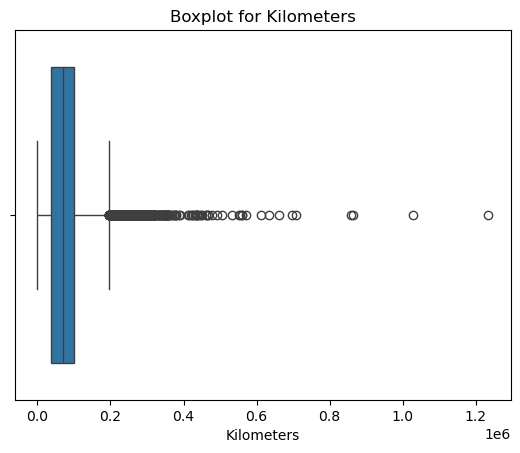

In [77]:
# Check for outliers using boxplot

sns.boxplot(data=df, x='Kilometers')
plt.title('Boxplot for Kilometers')
plt.show()


- I  haven't dropped the outliers because the outliers in this Kilometers dataset might represent valid but extreme cases, and removing them could lead to a loss of important information

In [78]:
df.to_csv('cleaned.csv', index=False)